In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
file_path = r'C:\Users\isama\Desktop\UNAD 2024\Titanic-Dataset.csv'  # Asegúrate de que la ruta esté correcta
df = pd.read_csv(file_path)

# Ver las primeras filas del dataset para entender su estructura
print("Primeras filas del dataset:")
print(df.head())

# Información del dataset
print("\nInformación general sobre el dataset:")
print(df.info())

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(df.describe())

# Revisar valores nulos
print("\nCantidad de valores nulos en cada columna:")
print(df.isnull().sum())


Primeras filas del dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450 

In [2]:
# Eliminar la columna 'Cabin' debido a la alta cantidad de valores faltantes
df = df.drop(columns=['Cabin'])

# Imputar los valores faltantes de 'Age' con la media de la columna (puedes optar por otros métodos)
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Imputar los valores faltantes de 'Embarked' con el valor más frecuente (modo)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Convertir las variables categóricas 'Sex' y 'Embarked' en variables numéricas
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})  # 'male' -> 0, 'female' -> 1
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})  # C -> 0, Q -> 1, S -> 2

# Verificar que los valores nulos han sido tratados y que la transformación fue exitosa
print("\nCantidad de valores nulos después del preprocesamiento:")
print(df.isnull().sum())

# Opcional: Ver las primeras filas después del preprocesamiento
print("\nPrimeras filas después del preprocesamiento:")
print(df.head())



Cantidad de valores nulos después del preprocesamiento:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Primeras filas después del preprocesamiento:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0     

C:\Users\isama\AppData\Local\Temp\ipykernel_12224\3764896438.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
C:\Users\isama\AppData\Local\Temp\ipykernel_12224\3764896438.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa


Correlación con la variable objetivo 'Survived':
Survived       1.000000
Sex            0.543351
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.069809
Embarked      -0.167675
Pclass        -0.338481
Name: Survived, dtype: float64


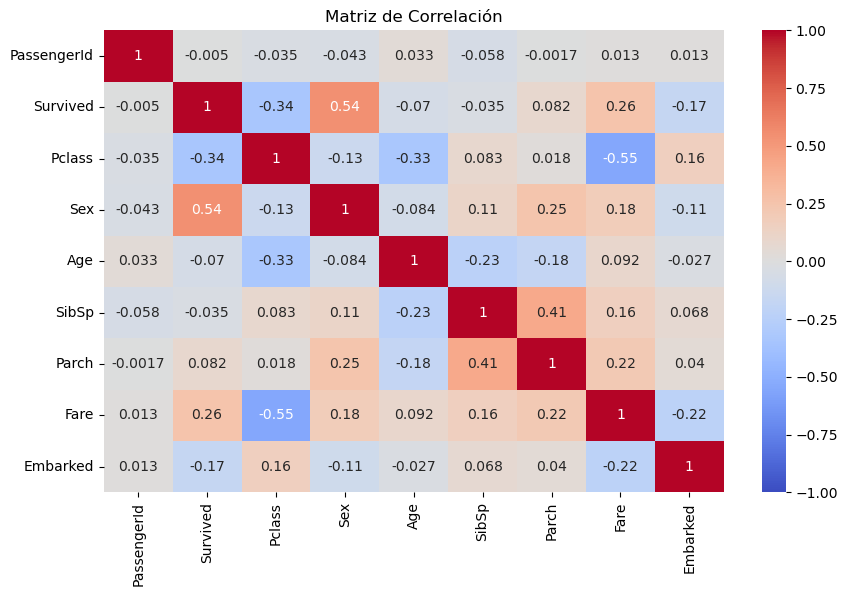

In [4]:
# Filtrar las columnas numéricas
numerical_df = df.select_dtypes(include=[np.number])

# Calcular la matriz de correlación solo con las columnas numéricas
correlation_matrix = numerical_df.corr()

# Mostrar la correlación con la variable objetivo 'Survived'
print("\nCorrelación con la variable objetivo 'Survived':")
print(correlation_matrix['Survived'].sort_values(ascending=False))

# Graficar la matriz de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Matriz de Correlación")
plt.show()


In [5]:
from sklearn.model_selection import train_test_split

# Seleccionar las características relevantes para el modelo
X = df[['Sex', 'Pclass', 'Fare']]  # Las características seleccionadas
y = df['Survived']  # La variable objetivo

# Dividir el dataset en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrar la forma de los conjuntos de entrenamiento y prueba
print(f"Conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"Conjunto de prueba: {X_test.shape[0]} muestras")


Conjunto de entrenamiento: 712 muestras
Conjunto de prueba: 179 muestras


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Inicializar el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con el conjunto de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el desempeño del modelo
mse = mean_squared_error(y_test, y_pred)  # Error cuadrático medio
r2 = r2_score(y_test, y_pred)  # R^2 (coeficiente de determinación)

# Mostrar los resultados
print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R^2): {r2}")


Error cuadrático medio (MSE): 0.14537705211946814
Coeficiente de determinación (R^2): 0.4005114379717015


In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Realizar predicciones binarizadas (convertir las probabilidades a 0 o 1)
y_pred_binary = [1 if i >= 0.5 else 0 for i in y_pred]

# Calcular las métricas
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

# Mostrar las métricas
print(f"Precisión (Accuracy): {accuracy}")
print(f"Precisión (Precision): {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")


Precisión (Accuracy): 0.7821229050279329
Precisión (Precision): 0.7536231884057971
Recall: 0.7027027027027027
F1-Score: 0.7272727272727273


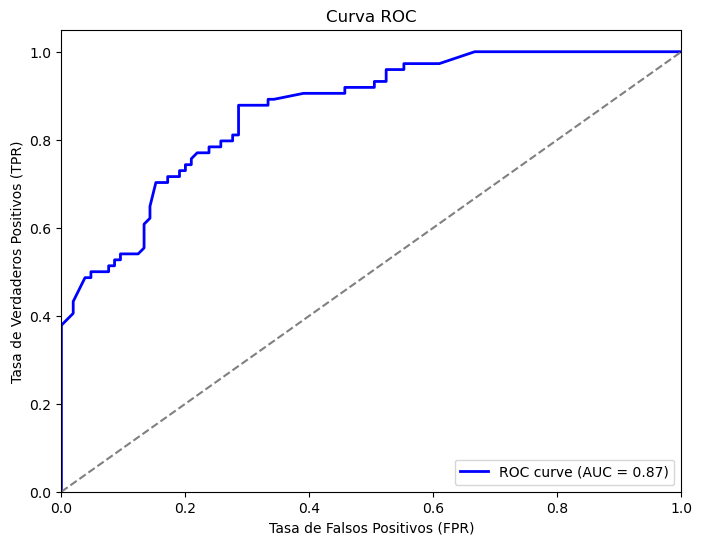

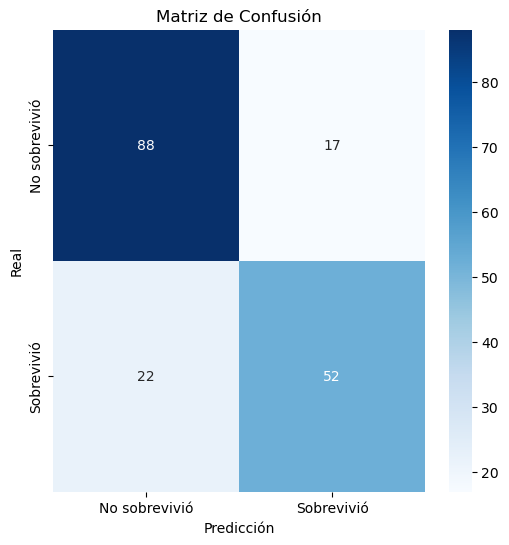

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix
import seaborn as sns

# 1. Graficar la Curva ROC
# Obtener las probabilidades de las predicciones para cada clase
y_pred_prob = model.predict(X_test)

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Graficar la Curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

# 2. Graficar la Matriz de Confusión
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred_binary)

# Graficar la matriz de confusión con seaborn
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No sobrevivió', 'Sobrevivió'], yticklabels=['No sobrevivió', 'Sobrevivió'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()


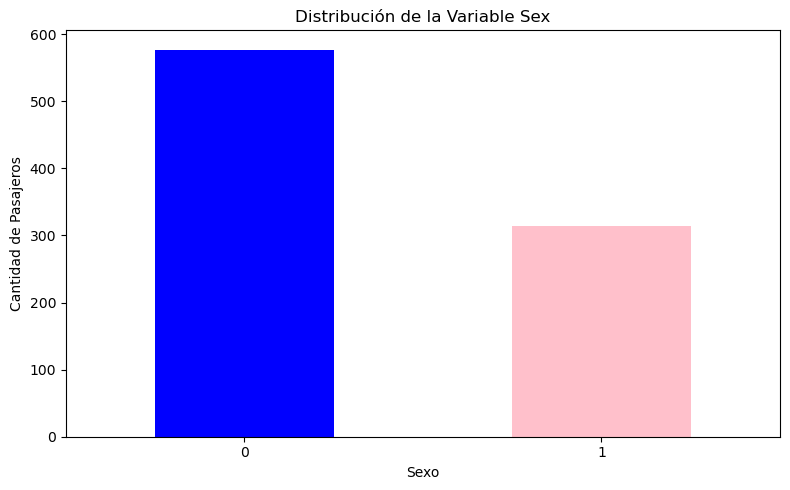

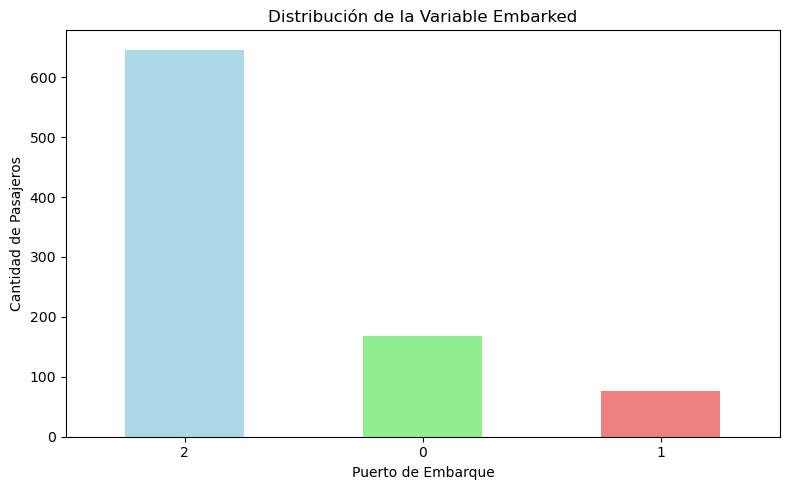

In [10]:
# Distribución de la columna 'Sex'
plt.figure(figsize=(8, 5))
df['Sex'].value_counts().plot(kind='bar', color=['blue', 'pink'])
plt.title('Distribución de la Variable Sex')
plt.xlabel('Sexo')
plt.ylabel('Cantidad de Pasajeros')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Distribución de la columna 'Embarked'
plt.figure(figsize=(8, 5))
df['Embarked'].value_counts().plot(kind='bar', color=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Distribución de la Variable Embarked')
plt.xlabel('Puerto de Embarque')
plt.ylabel('Cantidad de Pasajeros')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
